**Import Libraries**

In [21]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [23]:
!ls

drive  gdrive  sample_data


In [24]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"


In [25]:
!cd /content/drive/MyDrive/Kaggle


In [26]:
!ls

drive  gdrive  sample_data


**Downloaded the dataset from Kaggle**

1.   Sign Language MNIST (https://www.kaggle.com/datamunge/sign-language-mnist#)




In [27]:
!kaggle datasets download -d datamunge/sign-language-mnist 

 78% 49.0M/62.6M [00:01<00:00, 23.6MB/s]
100% 62.6M/62.6M [00:01<00:00, 37.1MB/s]


In [28]:
!ls

drive  gdrive  sample_data  sign-language-mnist.zip


**Now unzipping the file here**

In [29]:
!unzip \*.zip && re *.


Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  
/bin/bash: re: command not found


In [30]:
ls

american_sign_language.PNG  gdrive/                  sign_mnist_test.csv
amer_sign2.png              sample_data/             sign_mnist_train/
amer_sign3.png              sign-language-mnist.zip  sign_mnist_train.csv
drive/                      sign_mnist_test/


In [34]:
def get_data(filename):
  # First we need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so we should ignore it
  # Each successive line will contians 785 comma separated values between 0 and 255
  # The first value will be the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Steps: 
  # If we read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # We then will take a look at np.array_split to turn the 784 pixels into 28x28
  # We will be reading in strings, but need the values to be floats
  # We will use np.array().astype for a conversion
  
    with open(filename) as training_file:
      reader = csv.reader(training_file, delimiter=',')    
      imgs = []
      labels = []
      next(reader, None)        
      for row in reader:
          label = row[0]
          data = row[1:]
          img = np.array(data).reshape((28, 28))

          imgs.append(img)
          labels.append(label)

      images = np.array(imgs).astype(float)
      labels = np.array(labels).astype(float)

    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

path_sign_mnist_train = "sign_mnist_train.csv"
path_sign_mnist_test = "sign_mnist_test.csv"

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [32]:
!ls

american_sign_language.PNG  gdrive		     sign_mnist_test.csv
amer_sign2.png		    sample_data		     sign_mnist_train
amer_sign3.png		    sign-language-mnist.zip  sign_mnist_train.csv
drive			    sign_mnist_test


In [35]:
# In this section we have to add another dimension to the data
# So, for example, if the array is (10000, 28, 28)
# We will need to make it (10000, 28, 28, 1)
# Need to use: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

TRAINING_DIR = "sign_mnist_train/"
# Created an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
    )

VALIDATION_DIR = "sign_mnist_test/"
validation_datagen = ImageDataGenerator(
    rescale = 1./255
    )
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [36]:
# Defined the model
model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compiled the Model. 
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy']
             )

# Training the Model
train_generator = train_datagen.flow(
    training_images, 
    training_labels,
    batch_size = 64
)
validation_generator = validation_datagen.flow(
    testing_images, 
    testing_labels,
    batch_size = 64
)
# model.fit can also be used here
history = model.fit_generator(train_generator,
                             epochs = 15,
#                              steps_per_epoch=20,
                             validation_data = validation_generator,
                             verbose =1,
                             validation_steps = 3)

model.evaluate(testing_images, testing_labels, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
429/429 [==============================] - 43s 33ms/step - loss: 2.6879 - accuracy: 0.1901 - val_loss: 1.6704 - val_accuracy: 0.4427
Epoch 2/15
429/429 [==============================] - 14s 32ms/step - loss: 1.8553 - accuracy: 0.4160 - val_loss: 0.8587 - val_accuracy: 0.7031
Epoch 3/15
429/429 [==============================] - 14s 32ms/step - loss: 1.3787 - accuracy: 0.5579 - val_loss: 0.6571 - val_accuracy: 0.7865
Epoch 4/15
429/429 [==============================] - 13s 31ms/step - loss: 1.0676 - accuracy: 0.6508 - val_loss: 0.7078 - val_accuracy: 0.7500
Epoch 5/15
429/429 [==============================] - 14s 32ms/step - loss: 0.8498 - accuracy: 0.7207 - val_loss: 0.5496 - val_accuracy: 0.7708
Epoch 6/15
429/429 [==============================] - 14s 32ms/step - loss: 0.7128 - accuracy: 0.7646 - val_loss: 0.2520 - val_accuracy: 0.9115
Epoch 7/15
429/429 [==============================] - 14s 32ms/step - loss: 0.5996 - accuracy: 0.8020 - val_loss: 0.2207 - val_accuracy:

[162.69644165039062, 0.7328499555587769]

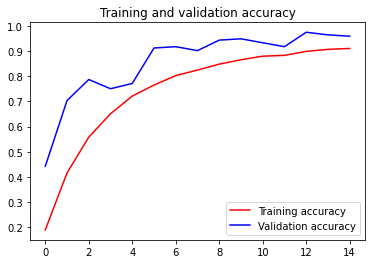

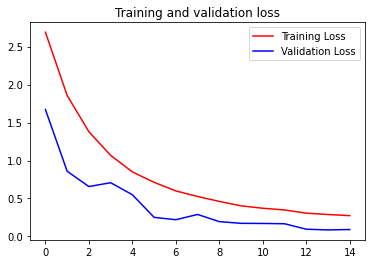

In [37]:
# Plotted the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()